Capstone Project_Lim Wei Shun_VI_Due 04 Oct 2022

# Problem Statement

How can Financial insitutions accurately predict the probability of loan defaults by prospective customers? 


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [57]:
#data set from: https://www.kaggle.com/datasets/b934bbd9d19e1c321cf5f121b9b8f9bea4f1e770ea8d4cfdf445fb34ab80f42c?resource=download
df = pd.read_csv('Loan Prediction.csv')
print(df)

      Index  Employed  Bank Balance  Annual Salary  Defaulted?
0         1         1       8754.36      532339.56           0
1         2         0       9806.16      145273.56           0
2         3         1      12882.60      381205.68           0
3         4         1       6351.00      428453.88           0
4         5         1       9427.92      461562.00           0
...     ...       ...           ...            ...         ...
9995   9996         1       8538.72      635908.56           0
9996   9997         1       9095.52      235928.64           0
9997   9998         1      10144.92      703633.92           0
9998   9999         1      18828.12      440029.32           0
9999  10000         0       2411.04      202355.40           0

[10000 rows x 5 columns]


In [58]:
#EDA
df.shape
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


# Data Cleaning Process


Removing Duplicates

In [59]:
df.duplicated().sum()

0

In [60]:
#No duplicate, proceeed to check for blank data rows. 
df.isnull().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

In [61]:
#No blank data rows, proceed to find outliers. 

In [62]:
#Find out main informations of the dataset.
df.describe()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


array([[<AxesSubplot:title={'center':'Index'}>,
        <AxesSubplot:title={'center':'Employed'}>],
       [<AxesSubplot:title={'center':'Bank Balance'}>,
        <AxesSubplot:title={'center':'Annual Salary'}>],
       [<AxesSubplot:title={'center':'Defaulted?'}>, <AxesSubplot:>]],
      dtype=object)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


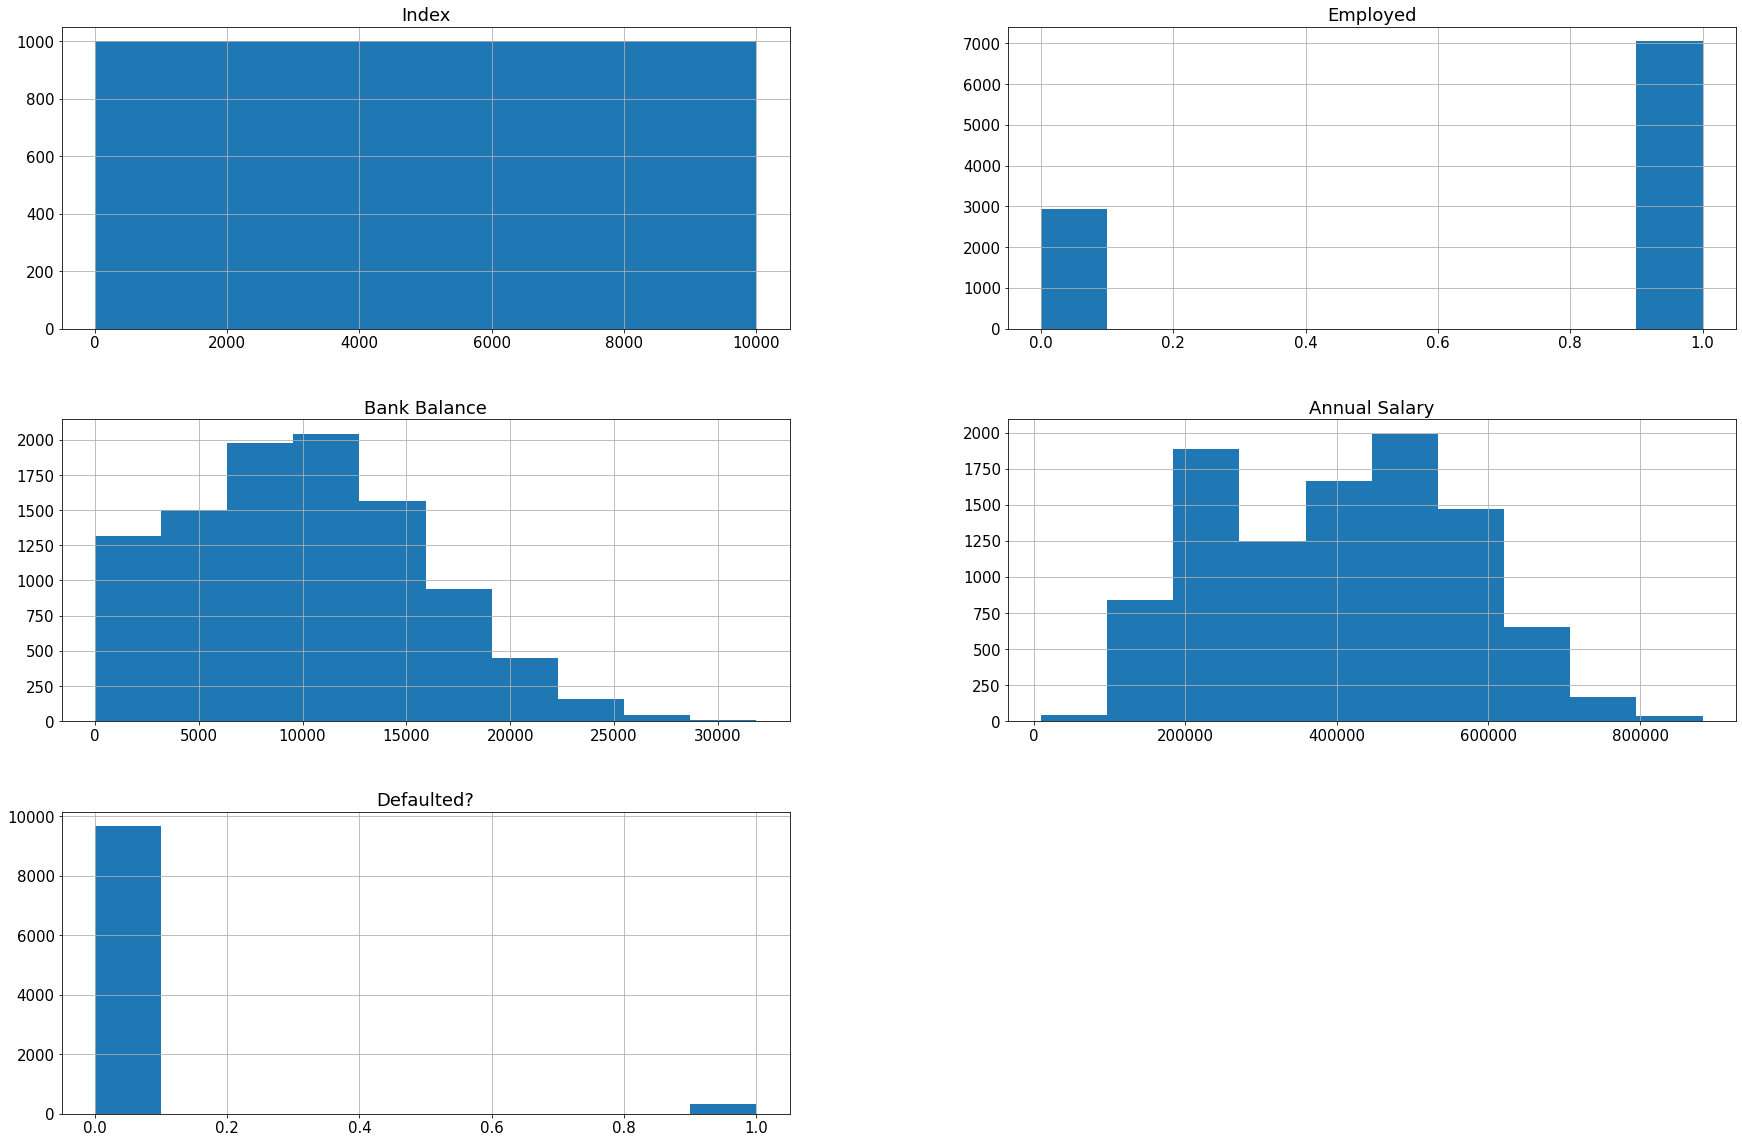

In [63]:
#produce Histogram for better analysis. 
df.hist(figsize=(30,20))

In [64]:
#as Index column does not have significant data, drop. 
df = df.drop(['Index'],axis=1)
#df.head() to show the remaining columns
df.head()

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0


# Visualisations

In [65]:
print(df)

      Employed  Bank Balance  Annual Salary  Defaulted?
0            1       8754.36      532339.56           0
1            0       9806.16      145273.56           0
2            1      12882.60      381205.68           0
3            1       6351.00      428453.88           0
4            1       9427.92      461562.00           0
...        ...           ...            ...         ...
9995         1       8538.72      635908.56           0
9996         1       9095.52      235928.64           0
9997         1      10144.92      703633.92           0
9998         1      18828.12      440029.32           0
9999         0       2411.04      202355.40           0

[10000 rows x 4 columns]


In [66]:
#to create upper and lower ceiling and floor respectively
BB_Q1 = df['Bank Balance'].quantile(0.25)
BB_Q3 = df['Bank Balance'].quantile(0.75)
BB_IQR = BB_Q3 - BB_Q1
BB_Upper = BB_Q3 + 1.5 * BB_IQR
BB_Lower = BB_Q1 - 1.5 * BB_IQR

#Hypothesis 1: Customers who are unemployed tend to default on their payment.

In [67]:
# to eliminate outliers 
rslt_df_BB = df.loc[(df['Bank Balance'] < BB_Upper) & (df['Bank Balance'] > BB_Lower) & (df['Employed'] != 1)]
rslt_df_BB

,Employed,Bank Balance,Annual Salary,Defaulted?
1,0,9806.16,145273.56,0
5,0,11035.08,89898.72,0
7,0,9704.04,211205.40,0
10,0,0.00,262452.84,0
11,0,14646.96,159222.72,0
...,...,...,...,...
9980,0,9240.24,164217.48,0
9986,0,4815.96,183984.24,0
9989,0,11991.36,240160.20,0
9994,0,2068.92,179471.28,0


In [68]:
#p-value testing for Bank Balance
#tset, pval = ttest_1samp(rslt_df_BB['Employed'], 1)
t,p = stats.ttest_ind(rslt_df_BB['Employed'], rslt_df_BB['Defaulted?'], 
                      equal_var=False, alternative='two-sided')

print("p-values",p)

if p < 0.05:
    print('Reject Hypothesis 1')
else:
    print('Do not reject and do not accept Hypothesis 1')

p-values 5.83385256304003e-26
Reject Hypothesis 1


#Hypothesis 2: Customers who default fall above the mean value for 'Bank Balance' and 'Annual Salary' respectively. 

In [69]:
x = df[(df["Defaulted?"]==1) & (df["Employed"]==0)]
print(x)

      Employed  Bank Balance  Annual Salary  Defaulted?
136          0      17844.00      214252.80           1
173          0      26469.60      171257.88           1
201          0      21296.28      244314.12           1
209          0      22792.68      247862.40           1
241          0      18874.32      179162.16           1
...        ...           ...            ...         ...
9510         0      20717.76      163855.20           1
9610         0      18026.28      223242.00           1
9783         0      18366.60      156047.16           1
9796         0      22407.72      296645.76           1
9921         0      19534.80      210564.00           1

[127 rows x 4 columns]


In [70]:
#find out how many unemployed individuals defaulted on payment
print(x.count())

Employed         127
Bank Balance     127
Annual Salary    127
Defaulted?       127
dtype: int64


In [71]:
#127 unemployed customers who defaulted on payment

In [72]:
bankMean = 10024.498524
custWithBankBelowMean = df[df["Bank Balance"] < bankMean]
print(custWithBankBelowMean)
defaulted = custWithBankBelowMean[custWithBankBelowMean["Defaulted?"] == 1]
print(str(defaulted.shape[0])+"/"+str(custWithAnnualBelowMean.shape[0])+" defaulted")

      Employed  Bank Balance  Annual Salary  Defaulted?
0            1       8754.36      532339.56           0
1            0       9806.16      145273.56           0
3            1       6351.00      428453.88           0
4            1       9427.92      461562.00           0
6            1       9906.12      298862.76           0
...        ...           ...            ...         ...
9991         1       7905.60      657624.96           0
9994         0       2068.92      179471.28           0
9995         1       8538.72      635908.56           0
9996         1       9095.52      235928.64           0
9999         0       2411.04      202355.40           0

[5093 rows x 4 columns]
3/4736 defaulted


In [73]:
annualMean = 402203.782224
custWithAnnualBelowMean = df[df["Annual Salary"] < annualMean]
print(custWithAnnualBelowMean)
defaulted = custWithAnnualBelowMean[custWithAnnualBelowMean["Defaulted?"] == 1]
print(str(defaulted.shape[0])+"/"+str(custWithAnnualBelowMean.shape[0])+" defaulted")

      Employed  Bank Balance  Annual Salary  Defaulted?
1            0       9806.16      145273.56           0
2            1      12882.60      381205.68           0
5            0      11035.08       89898.72           0
6            1       9906.12      298862.76           0
7            0       9704.04      211205.40           0
...        ...           ...            ...         ...
9989         0      11991.36      240160.20           0
9990         1       4468.56      304498.80           0
9994         0       2068.92      179471.28           0
9996         1       9095.52      235928.64           0
9999         0       2411.04      202355.40           0

[4736 rows x 4 columns]
175/4736 defaulted


In [74]:
#Accept Hypothesis 2 as both EDA shown that only a comparative small number defaulted out of the large sample size

In [75]:
#Use Pairplot & Heatmap to check for further relationships

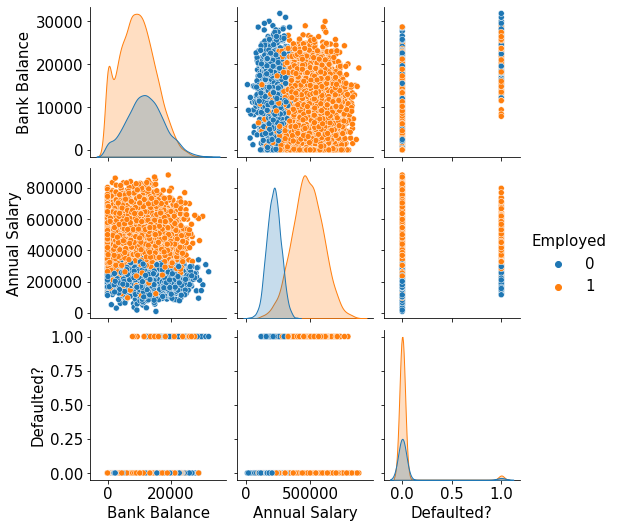

In [76]:
sns.pairplot(df,hue="Employed")

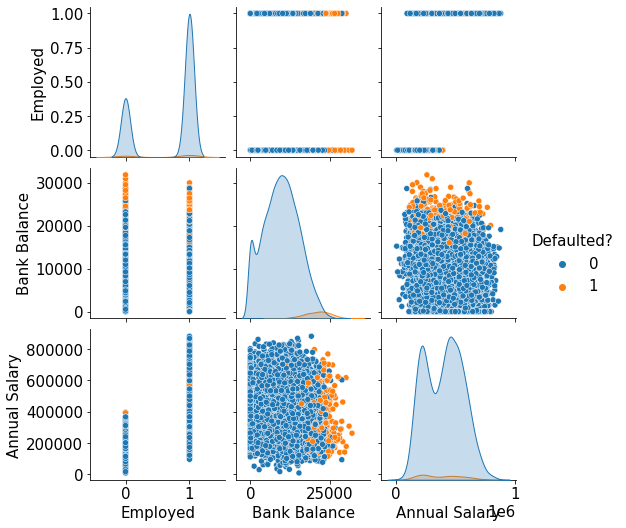

In [77]:
sns.pairplot(df,hue="Defaulted?")

<AxesSubplot:>

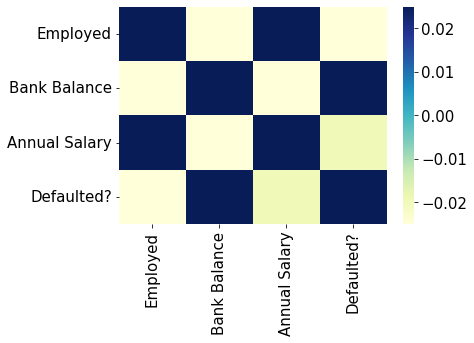

In [78]:
sns.heatmap(df.corr(),cmap="YlGnBu",
            vmin=-0.025,vmax=0.025)

# Machine Learning Model - KNN

In [79]:
#train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df,df['Defaulted?'],random_state=2,test_size=0.2)
#initialize model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

#fit train data
dt.fit(X_train,y_train)

#predict test data
y_preds = dt.predict(X_test)

#use accuracy as metric
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

1.0

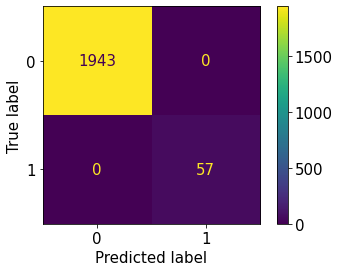

In [80]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

font = {'family' : 'normal', 'size'   : 15}
plt.rc('font', **font)

cm = confusion_matrix(y_test, y_preds)

cm_display = ConfusionMatrixDisplay(cm).plot()

AUC score:  1.0


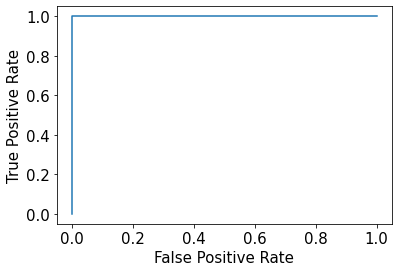

In [81]:
#ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import RocCurveDisplay
y_score = dt.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=dt.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

print('AUC score: ',roc_auc_score(y_test,dt.predict_proba(X_test)[:,1])) 

In [82]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(random_state=42)

# Create the parameters list we wish to tune.
parameters = {
        'max_depth': [1,2,3,4,5,6],
        'min_samples_leaf':[2,3,4],
        'min_samples_split': [10,20,30]    
}

# Make a accuracy scoring object.
from sklearn.metrics import accuracy_score
scorer = make_scorer(accuracy_score)

# Perform grid search on the classifier using 'scorer' as the scoring method.
# Create the object.
grid_obj = GridSearchCV(clf,parameters, scoring=scorer, cv=20,n_jobs=-1)

# Fit the grid search object to the training data and find the optimal parameters.
# Fit the data
grid_fit = grid_obj.fit(X_train, y_train)

# View results of GridSearchCV in DataFrame
pd.concat([pd.DataFrame(grid_fit.cv_results_["params"]),pd.DataFrame(grid_fit.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

# Get the estimator.
best_clf = grid_fit.best_estimator_

# Fit the new model.
best_clf.fit(X_train, y_train)

# Make predictions using the new model.
best_test_predictions = best_clf.predict(X_test)

# Get the accuracy score
accuracy_score(y_test,best_test_predictions)

1.0

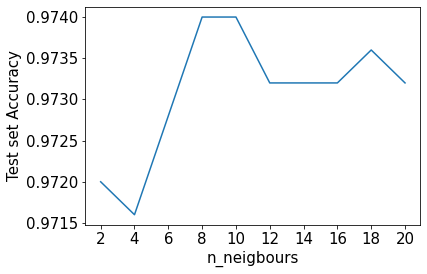

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

y_knn=df.pop('Defaulted?')
X_knn=df.select_dtypes('number')

X_knn_train,X_knn_test,y_knn_train,y_knn_test = train_test_split(X_knn,y_knn,random_state=2)

scores=[]

for n in range(2,20+1,2):
    knn = KNeighborsClassifier(n_neighbors=n)
    _=knn.fit(X_knn_train,y_knn_train)
    y_pred_knn=knn.predict(X_knn_test)
    scores.append(accuracy_score(y_knn_test,y_pred_knn))

_=plt.plot(scores)
_=plt.xticks(ticks=range(10),labels=range(2,20+1,2))
_ = plt.xlabel('n_neigbours')
_ = plt.ylabel('Test set Accuracy')

In [84]:
#run KNN on best n_neighbours
knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(X_knn_train,y_knn_train)
y_pred_knn=knn.predict(X_knn_test)
print(accuracy_score(y_knn_test,y_pred_knn))

0.9732


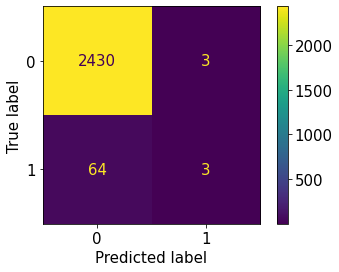

In [85]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

font = {'family' : 'normal',
        'size'   : 15}
plt.rc('font', **font)

cm_knn = confusion_matrix(y_knn_test, y_pred_knn)

cm_knn_display = ConfusionMatrixDisplay(cm_knn).plot()

AUC score:  0.845829422554306


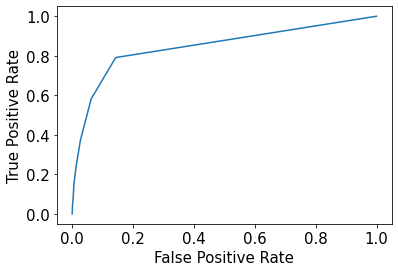

In [86]:
#ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay

y_knn_score = knn.predict_proba(X_knn_test)[:,1]

fpr, tpr, _ = roc_curve(y_knn_test, y_knn_score, pos_label=knn.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

print('AUC score: ',roc_auc_score(y_knn_test,knn.predict_proba(X_knn_test)[:,1])) 

In [87]:
from sklearn.model_selection import GridSearchCV

# Setup our GridSearch Parmaters
search_parameters = {
    'n_neighbors': [10,12],
    'weights': ('uniform', 'distance'),
    'algorithm': ('ball_tree', 'kd_tree','brute','auto'),
    'p': [1,2]
}

# Intialize GridSearchCV
clf = GridSearchCV(knn, search_parameters, verbose=1)

# Fit our training data
clf.fit(X_knn_train,y_knn_train)

print('Best Estimator:',clf.best_estimator_.n_neighbors)
print('Best params:',clf.best_params_)
print('Best Score:',clf.best_score_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Estimator: 10
Best params: {'algorithm': 'ball_tree', 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}
Best Score: 0.9658666666666667


In [88]:
#fit best
knn_best = KNeighborsClassifier(n_neighbors=12,algorithm='ball_tree',p=1,weights='uniform')
knn_best.fit(X_knn_train, y_knn_train)
y_pred_knn_best=knn_best.predict(X_knn_test)
print(accuracy_score(y_knn_test,y_pred_knn_best))

0.9728


In [89]:
knn_best.predict(pd.DataFrame([[0.5,20000,20000]]))

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [90]:
X_knn_test

,Employed,Bank Balance,Annual Salary
7878,1,8118.84,495941.16
3224,1,8427.36,596507.52
1919,1,7140.84,358114.68
4432,1,9903.48,553775.52
4835,0,23632.92,284092.56
...,...,...,...
8042,1,4614.36,432232.92
9060,1,16662.72,253815.12
8093,1,10401.24,364806.72
3858,1,3486.72,158878.44


In [91]:
knn_best.predict(pd.DataFrame(data=[[0,12882,381205]],columns=['Employed','Bank Balance','Annual Salary']))

array([0], dtype=int64)

We found out from the visualisation models (heatmap and pair plot graphs) that there is a correlationship between "Bank Balance" and "Defaulted?" 

Using KNN Machine Learning Models to test the dataset, indicating high bank value of above 20000 dollars will be considered a risk to default. Result shown above is array (0), which supports the point that customers holding an attribute value of 20000 dollars and above have a higher chance of loan repayment default. 

Limitation are 
1. Lack of datasets inputs into the KNN machine learning model.
2. Data set may not be the full representation of the full population.
3. Annual Salary and Employment Rate has minimal correlation with the default risk rate, thus makinig minimal interrepation from the dataset.

To answer back to the Problem Statement, financial insitutions can consider checking prospective customers with bank balance above 20000 dollars as being of higher risk, and be given more layers of financial evaluation. 